In [1]:
from sentence_transformers import SentenceTransformer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/home/manoranjan.n/jupyter/jupyter_env/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


#### ***Calculating the Sentence Similarity***

In [18]:
def dot_product(query_vector, document_vector):
    document_score = {}
    for document_name, vector in document_vector.items():
        document_score[document_name] = np.dot(query_vector, vector)
    return document_score

#### ***Generating the Vector/Embeddings for our text***

In [3]:
def encode_documents(documents:list, model):
    document_vector = {}
    for document in documents:
        document_vector[document] = model.encode(document)
    return document_vector     

#### ***Embedding/Encoder Model Instantiate***

In [19]:
model = SentenceTransformer('intfloat/e5-small-v2')

/home/manoranjan.n/jupyter/jupyter_env/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


#### ***Atoms***

In [5]:
query = "I love Machine learning"

In [6]:
documents = ['anger', 'love', 'joy', 'sad', 'laugh']

In [7]:
document_encoded = encode_documents(documents, model)

In [8]:
document_similarity = dot_product(model.encode(query), document_encoded)

In [9]:
document_similarity

{'anger': 0.7448547,
 'love': 0.8211584,
 'joy': 0.7735107,
 'sad': 0.7654619,
 'laugh': 0.7703371}

In [10]:
df = pd.DataFrame(list(document_similarity.items()), columns = ["Words", "Score"])

/tmp/ipykernel_54898/885780234.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Words', y='Score', data=df, palette='viridis')


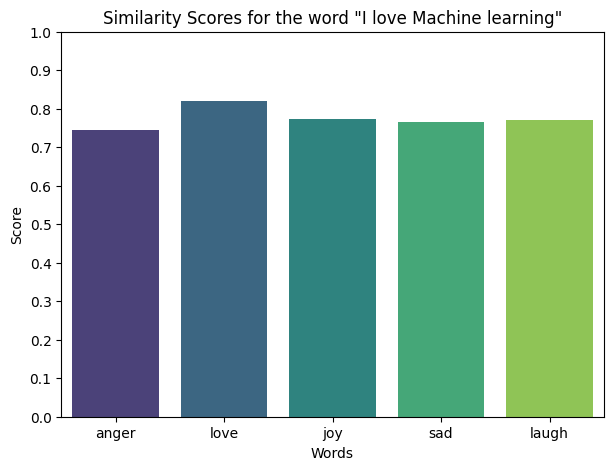

In [11]:
# Plotting
plt.figure(figsize=(7, 5))
sns.barplot(x='Words', y='Score', data=df, palette='viridis')

# Adding title and labels
plt.title(f'Similarity Scores for the word "{query}"')
plt.xlabel('Words')
plt.ylabel('Score')
plt.ylim(0, 1)

plt.yticks([i * 0.1 for i in range(0, 11)])
# Show plot
plt.show()

In [12]:
from langchain_groq import ChatGroq

In [21]:
high_score_document = max(document_similarity, key=document_similarity.get)

In [22]:
print(high_score_document)
print(query)

love
I love Machine learning


In [15]:
llm = ChatGroq(groq_api_key="")

In [16]:
response = llm.invoke(
    f"""Provided two words, tell me a 3 line story using the same"
    word 1: {query}
    word 2: {high_score_document}
""")

In [17]:
response.content

'John had always been passionate about machine learning. He loved how it could analyze large datasets and make accurate predictions. However, his love for machine learning often led to long hours spent in front of his computer, neglecting his relationships.\n\nOne day, his girlfriend Sarah confronted him about his obsession. She expressed her anger and frustration about how he prioritized his work over their relationship. Sarah felt ignored and unimportant, which led to several heated arguments.\n\nJohn realized that he needed to find a balance between his work and personal life. He decided to set boundaries and dedicate specific time for his relationship. This way, he could continue pursuing his love for machine learning without compromising his relationship with Sarah.'